In [2]:
'''
A medical claim is denoted by a claim number ('Claim.Number'). Each claim consists of one or more medical lines denoted by a claim line number ('Claim.Line.Number').

1. J-codes are procedure codes that start with the letter 'J'.

     A. Find the number of claim lines that have J-codes.

     B. How much was paid for J-codes to providers for 'in network' claims?

     C. What are the top five J-codes based on the payment to providers?

'''

import matplotlib.pyplot as plt
from collections import Counter, defaultdict



with open('/Users/pankaj/dev/git/smu/ML2/HW2/claim.sample.csv', 'r') as f:
     claims = f.readlines()

claims_list =[dict(zip( claims[0].split(','), claim.split(','))) for claim in claims[1:]]
j_claims = list(filter(lambda x: x['Procedure.Code'].startswith('J'),claims_list))
j_code_provider_payment = sum([float(x['Provider.Payment.Amount']) for x in j_claims if x['In.Out.Of.Network'].startswith('I')])
sorted_pay = sorted(j_claims , key= lambda x: x['Provider.Payment.Amount'] , reverse=True)
[print(x['Procedure.Code']) for x in sorted_pay[0:5]]



J2785
J1745
J1100
J1100
J7506


[None, None, None, None, None]

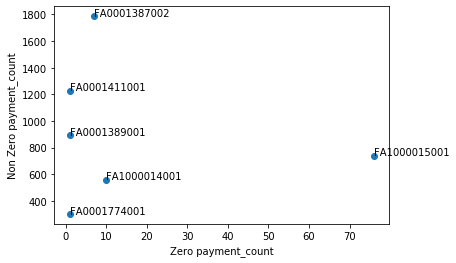

In [3]:
'''
2. For the following exercises, determine the number of providers that were paid for at least one J-code.
 Use the J-code claims for these providers to complete the following exercises.

    A. Create a scatter plot that displays the number of unpaid claims (lines where the ‘Provider.Payment.Amount’ field is equal to zero) 
    for each provider versus the number of paid claims.

    B. What insights can you suggest from the graph?

    C. Based on the graph, is the behavior of any of the providers concerning? Explain.
'''

claims_dict = dict()
nj_claims = [x for x in j_claims if float(x['Provider.Payment.Amount'])!=0]
zero_payment_provider = Counter([ x['Provider.ID'] for x in nj_claims if x['Provider.Payment.Amount'].startswith('0')])
non_zero_payment_provider = Counter([ x['Provider.ID'] for x in nj_claims if float(x['Provider.Payment.Amount'])!=0])

def show_plot():
    dd = defaultdict(list)
    fig, ax = plt.subplots()
    for d in (zero_payment_provider, non_zero_payment_provider):
        for k, v in d.items():
            dd[k].append(v)
    z = [x[0] for x in dd.values() if len(x) > 1]
    y = [x[1] for x in dd.values() if len(x) > 1]
    ax.scatter(z, y)
    n = [x for x in dd.keys() if len(dd[x]) > 1]
    for i, txt in enumerate(n):
        ax.annotate(txt, (z[i], y[i]))
    plt.xlabel('Zero payment_count')
    plt.ylabel('Non Zero payment_count')
    plt.show()


show_plot()



In [4]:
'''
3. Consider all claim lines with a J-code.

     A. What percentage of J-code claim lines were unpaid?

     B. Create a model to predict when a J-code is unpaid. Explain why you choose the modeling approach.

     C. How accurate is your model at predicting unpaid claims?

      D. What data attributes are predominately influencing the rate of non-payment?
'''
zero_payment_count = len([ x['Provider.ID'] for x in j_claims if x['Provider.Payment.Amount'].startswith('0')])
non_zero_payment_count = len([ x['Provider.ID'] for x in j_claims if float(x['Provider.Payment.Amount'])!=0])


print(zero_payment_count/non_zero_payment_count)

7.425346077785102


In [5]:
from keras.layers import Dense

Using TensorFlow backend.


In [6]:
from keras.layers import Embedding 

In [7]:
from keras import models
from keras import layers

In [6]:
j_claims[0] 

{'V1': '3074',
 'Claim.Number': '74645490',
 'Claim.Line.Number': '10',
 'Member.ID': '1992052',
 'Provider.ID': 'FA0001389001',
 'Line.Of.Business.ID': '5',
 'Revenue.Code': '636',
 'Service.Code': 'OP7O',
 'Place.Of.Service.Code': ' ',
 'Procedure.Code': 'J1650',
 'Diagnosis.Code': '4359',
 'Claim.Charge.Amount': '592.201995',
 'Denial.Reason.Code': 'KAO',
 'Price.Index': 'A',
 'In.Out.Of.Network': 'I',
 'Reference.Index': 'N',
 'Pricing.Index': 'N',
 'Capitation.Index': ' ',
 'Subscriber.Payment.Amount': '0',
 'Provider.Payment.Amount': '0',
 'Group.Index': '114',
 'Subscriber.Index': '1613650',
 'Subgroup.Index': '0',
 'Claim.Type': 'M',
 'Claim.Subscriber.Type': 'H',
 'Claim.Pre.Prince.Index': 'S',
 'Claim.Current.Status': '91',
 'Network.ID': 'P00000000001',
 'Agreement.ID\n': 'FH001309QB01\n'}

In [7]:
claims[1]

'1,28849991,1,9583423,FA0001411002,2,128,RR8I, , ,V5789,19356.96, ,A,I,N,N,N,0,15036.21,110,7763000,0,M,H, ,2,P00000000002,FH001310QB01\n'

In [9]:
claims_data = [x.split(',') for x in claims]

In [13]:
import math

In [10]:
claims_data[0].index('Procedure.Code')

9

In [14]:
y_data = [0 if math.isclose(float(x[19]),0) else 1 for x in  claims_data[1:] if x[claims_data[0].index('Procedure.Code')].startswith('J')]

In [11]:
x_data = [[float(x[11]) ] for x in claims_data[1:] if x[claims_data[0].index('Procedure.Code')].startswith('J') ]

In [56]:
claims_data[0]

['V1',
 'Claim.Number',
 'Claim.Line.Number',
 'Member.ID',
 'Provider.ID',
 'Line.Of.Business.ID',
 'Revenue.Code',
 'Service.Code',
 'Place.Of.Service.Code',
 'Procedure.Code',
 'Diagnosis.Code',
 'Claim.Charge.Amount',
 'Denial.Reason.Code',
 'Price.Index',
 'In.Out.Of.Network',
 'Reference.Index',
 'Pricing.Index',
 'Capitation.Index',
 'Subscriber.Payment.Amount',
 'Provider.Payment.Amount',
 'Group.Index',
 'Subscriber.Index',
 'Subgroup.Index',
 'Claim.Type',
 'Claim.Subscriber.Type',
 'Claim.Pre.Prince.Index',
 'Claim.Current.Status',
 'Network.ID',
 'Agreement.ID\n']

In [45]:
import numpy as np

In [58]:
claims_data[0].index('Claim.Charge.Amount')

11

In [11]:
set([x[14] for x in claims_data[1:]])

{' ', 'I', 'O'}

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=  4)
#knn.fit(x_data, y_data)

In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_data, y_data)
#sc = lr.score(x_data, y_data)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
lr.predict(x_data[0:10])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [17]:
lr.score(x_data, y_data)

0.8814399655098082

In [60]:
list(filter (lambda x:not math.isclose(x[0],0),x_data))

[[308.625],
 [7625.2596],
 [2127.105225],
 [4.32075],
 [324.05625],
 [648.1125],
 [2965.133205],
 [184.767615],
 [40.12125],
 [184.767615],
 [30.726705],
 [330.32751],
 [330.32751],
 [30.726705],
 [184.767615],
 [174.2126],
 [3986.744],
 [61.50279],
 [85.45209],
 [138.1899],
 [149.5473],
 [83.4522],
 [125.5116],
 [133.5235],
 [132.931],
 [105.488],
 [115.4998],
 [92.13074],
 [104.1548],
 [105.488],
 [363.8565],
 [2074.96],
 [1836.615],
 [174.1139],
 [1272.486],
 [607.5345],
 [1358.604]]

In [46]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(  drop='first')

In [18]:
[[x[14]] for x in claims_data[1:]]

[['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],
 ['I'],


In [47]:
enc.fit([[x[14]] for x in claims_data[1:]])

OneHotEncoder(categories='auto', drop='first', dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [48]:
aa = enc.transform([[x[14]] for x in claims_data[1:]])

In [52]:
aa.toarray()

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [22]:
len(x_data)

472559

In [49]:
x_data[1:3]

[[0.0], [0.0]]

In [24]:
len(aa.toarray())

472559

In [26]:
import numpy as np

In [62]:
x_data = np.concatenate((np.array(aa.toarray()),np.array(x_data)), axis =1)

In [34]:
np.concatenate((np.array(aa.toarray())[0:10],np.array(x_data)[0:10]), axis=1)

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [29]:
np.array(aa.toarray())

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [63]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_data, y_data)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
lr.score(x_data, y_data)

0.795187479235397

In [18]:
from collections import Counter

In [19]:
Counter(y_data)

Counter({0: 44961, 1: 6068})

In [21]:
44961/(44961+ 6068)

0.881087224911325